In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn. ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings. filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [43]:
! pip install --upgrade scikit-learn

In [45]:
import sklearn
print(sklearn.__version__)

1.0.2


In [3]:
df=pd.read_excel(r"C:\Users\Dell\Real estate valuation data set.xlsx")

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
x = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state = 101)

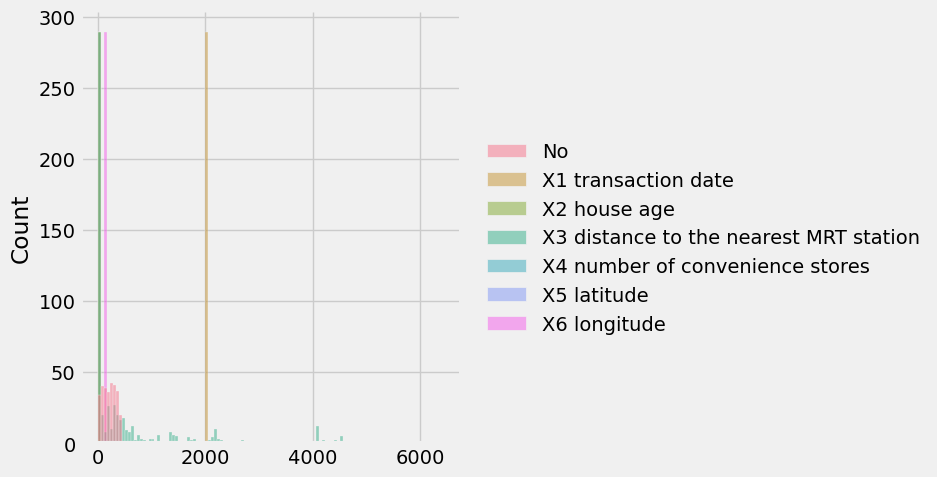

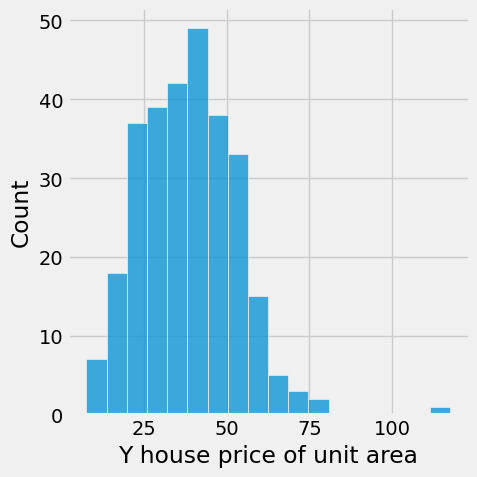

In [7]:
sns.displot(x_train)
sns.displot(y_train)

In [8]:
sns.countplot(df['Y house price of unit area'], hue = df['X4 number of convenience stores'])

<AxesSubplot:xlabel='Y house price of unit area', ylabel='count'>

In [9]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
df.shape

(414, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [12]:
df.isnull().any()

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

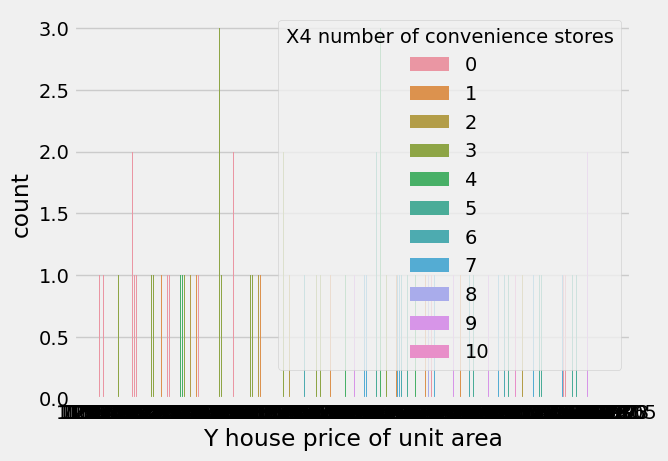

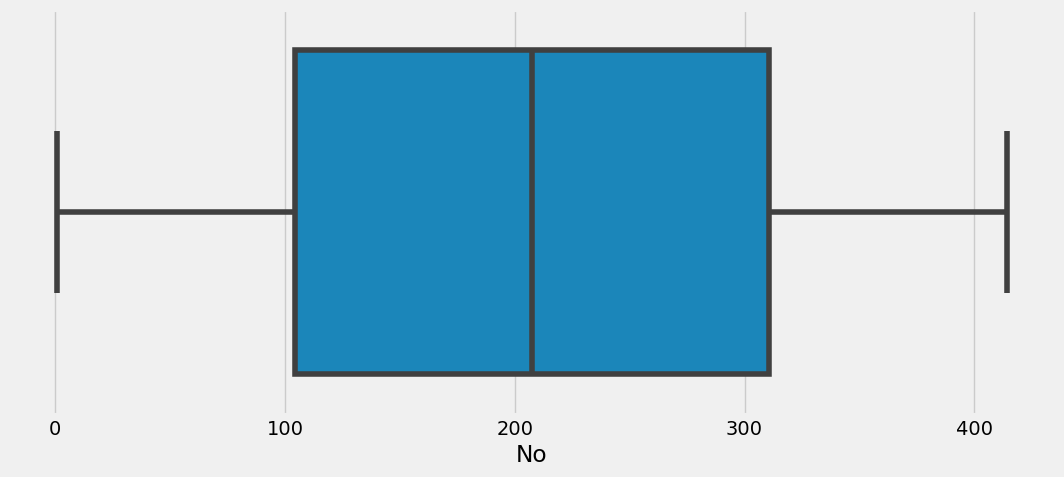

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot(df['No'])
plt.show()

In [14]:
lw=df['X3 distance to the nearest MRT station'].quantile(0.05)
up=df['X3 distance to the nearest MRT station'].quantile(0.95)
dt=(df['X3 distance to the nearest MRT station'] >lw) & (df['X3 distance to the nearest MRT station'] < up)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [46]:
dtr = DecisionTreeRegressor(random_state=40)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=40)

In [47]:
y_predd=dtr.predict(x_test)

In [49]:
from sklearn.ensemble import RandomForestRegressor


In [50]:
rf=RandomForestRegressor(n_estimators=20, random_state=80)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=80)

In [21]:
y_predr=rf.predict(x_testr)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
lr.fit(x_train,y_train)
LinearRegression()
y_predl=lr.predict(x_test)

In [52]:
import xgboost
xg = xgboost.XGBRegressor(objective='reg:linear',n_estimators=50, seed=23)
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [53]:
y_predx = xg.predict(x_test)

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=3,n_estimators=18, learning_rate=1)

In [55]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=1, n_estimators=18)

In [56]:
y_predg=gbr.predict(x_test)

In [57]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor(n_estimators=10, learning_rate=1,random_state=20)
adr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=10, random_state=20)

In [58]:
y_preda=adr.predict(x_test)

In [30]:
from sklearn.metrics import r2_score

In [59]:
print("The accuracy of Multi linear Regression" ,{r2_score(y_predl,y_test)})
print("The accuracy of Decision Tree Regression" ,{r2_score(y_predd,y_test)})
print("The accuracy of Random Forest Regression" ,{r2_score(y_predr,y_test)})
print("The accuracy of AdaBoost Regression" ,{r2_score(y_preda,y_test)})
print("The accuracy of Gradient Boost Regression" ,{r2_score(y_predg,y_test)})
print("The accuracy of XGBoost Regression" ,{r2_score(y_predx,y_test)})

The accuracy of Multi linear Regression {0.4180635109483136}
The accuracy of Decision Tree Regression {0.7448166754660341}
The accuracy of Random Forest Regression {0.7870957131226222}
The accuracy of AdaBoost Regression {0.689363473776685}
The accuracy of Gradient Boost Regression {0.5658972754112701}
The accuracy of XGBoost Regression {0.7337036671657219}


In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
ac = r2_score(y_predr, y_testr)
rm=mean_absolute_error(y_predr, y_test)
ms=mean_squared_error(y_predr, y_test)

In [61]:
ac

0.7870957131226222

In [62]:
rm

4.260599999999999

In [63]:
ms

30.56187939999999

In [66]:
import pickle
filename = 'price1.pkl'
pickle.dump(rf,open(filename, 'wb'))


In [67]:
import pickle
from sklearn.preprocessing import StandardScaler

# Load and preprocess your training data
# Replace this with your actual training data
#training_data = pd.read_excel(r"C:\Users\Dell\Real estate valuation data set.xlsx")
# Create a StandardScaler and fit it to the training data
scaler = StandardScaler()
scaler.fit(x_trainr)
scaler.fit(x_testr)
# Save the trained StandardScaler to a pickle file
with open("price2.pkl", "wb") as file:
    pickle.dump(scaler, file)
